<a href="https://colab.research.google.com/github/Stephaaniee/ProjectWork/blob/main/Tst2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from fastai.vision.all import *
from fastai.data.core import DataLoader
import random
import re
import os
import shutil
import PIL
import torch
import numpy as np
from fastai.data.external import untar_data, URLs
from fastai.data.transforms import get_image_files
from fastai.data.core import DataLoaders
from fastbook import *
import pathlib
import tensorflow as tf

In [4]:
set_seed(42)

In [5]:
#ensuring the images are the same size , label and augument the data
item_tfms = RandomResizedCrop(460, min_scale = 0.75, ratio=(1., 1.)),
batch_tfms = [*aug_transforms(size = 224, max_warp=0), Normalize.from_stats(*imagenet_stats)] #scaling the image to train faster
bs=64

In [21]:
dataTest = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed= 100),
    get_y = using_attr(RegexLabeller(pat = r'([\w]+).\d+..*$'), 'name'),
    # get_y = parent_label,
    item_tfms = RandomResizedCrop(460, min_scale = 0.75, ratio=(1., 1.)),
    batch_tfms = [*aug_transforms(size = 224, max_warp=0), Normalize.from_stats(*imagenet_stats)] #scaling the image to train faster
)

In [25]:
dls = dataTest.dataloaders('/content/drive/MyDrive/sugar_beets_test_1', bs=32)

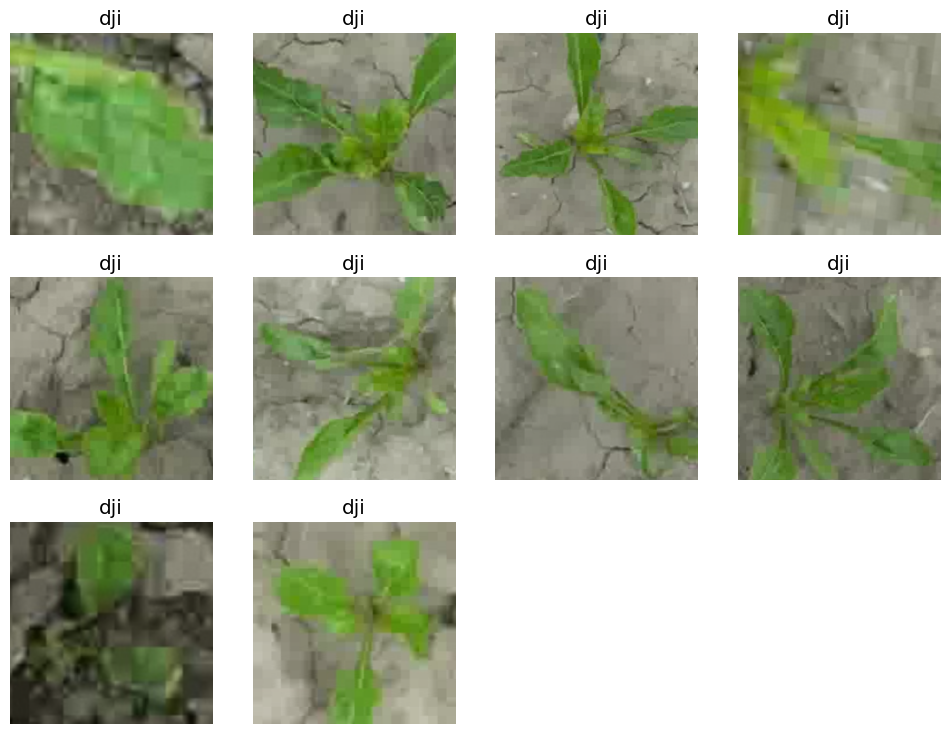

In [26]:
dls.show_batch(max_n=10)

In [ ]:
model = vision_learner(dls, resnet34, metrics = error_rate)
model.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
